Problem statement: this project understands how the student's performance (test score) is affected by other variables such as Gender,Ethnicity,Parental level of education, Lunch and test preparation course.



In [3]:
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("data/stud.csv")

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
print("Categories in 'gender' variable",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch ' variable",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course ' variable",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable ['female' 'male']
Categories in 'race/ethnicity' variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch ' variable ['standard' 'free/reduced']
Categories in 'test_preparation_course ' variable ['none' 'completed']


In [28]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

In [29]:
print("there are {} numerical features:{}".format(len(numerical_feature),numerical_feature))
print("there are {} categorical features:{}".format(len(categorical_feature),categorical_feature))

there are 3 numerical features:['math_score', 'reading_score', 'writing_score']
there are 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [ ]:
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]


In [33]:
df["average"]=df["total_score"]/3

In [39]:
reading_full=df[df['reading_score']==100]["average"].count()
writing_full=df[df['writing_score']==100]["average"].count()
math_full=df[df['math_score']==100]["average"].count()

print(f"Number of students with full marks in math  {math_full}")
print(f"Number of students with full marks in reading   {reading_full}")
print(f"Number of students with full marks in writing  {writing_full}")

Number of students with full marks in math  7
Number of students with full marks in reading   17
Number of students with full marks in writing  14


In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [47]:
reading_less_20=df[df["reading_score"]<=20]["average"].count()
writing_less_20=df[df["writing_score"]<=20]["average"].count()
math_less_20=df[df["math_score"]<=20]["average"].count()

print(f"Number of students with  marks  less than 20 in math  {math_less_20}")
print(f"Number of students with  marks  less than 20 in reading   {reading_less_20}")
print(f"Number of students with  marks  less than 20 in writing   {writing_less_20}")

Number of students with  marks  less than 20 in math  4
Number of students with  marks  less than 20 in reading   1
Number of students with  marks  less than 20 in writing   3


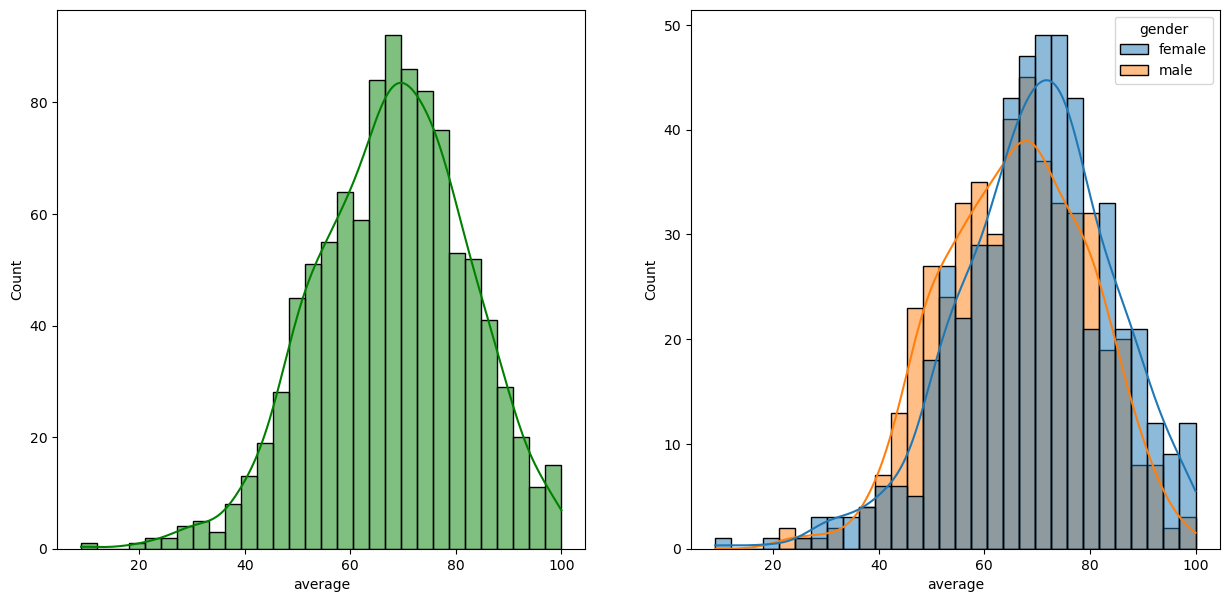

In [53]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average",bins=30,kde=True,hue='gender')
plt.show()